# Straight line Hough transform

Tutorial extracted from [here](https://scikit-image.org/docs/stable/auto_examples/edges/plot_line_hough_transform.html)

## Algorithm overview

$O$ = theta

Usually, lines are parameterised as $y = mx + c$, with a gradient $m$ and y-intercept $c$. However, this would mean that $m$ goes to infinity for vertical lines. Instead, we therefore construct a segment perpendicular to the line, leading to the origin. The line is represented by the **length of that segment, $r$,** and the **angle it makes with the x-axis, $O$**

The Hough transform constructs a histogram array representing the parameter space (i.e., an $M x N$ matrix, for $M$ different values of the radius and $N$ different values of $O$). For each parameter combination, $r$ and $O$, we then find the number of non-zero pixels in the input image that would fall close to the corresponding line, and increment the array at position ($r,O$) appropriately.

We can think of each non-zero pixel "voting" for potential line candidates. The local maxima in the resulting histogram indicates the parameters of the most probable lines. In our example, the maxima occur at 45 and 135 degrees, corresponding to the normal vector angles of each line.

## Line Hough Transform

In [3]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.draw import line as draw_line
import matplotlib.pyplot as plt
from matplotlib import cm

# notebook only
%matplotlib inline

In [4]:
# constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[draw_line(45,25,25,175)] = 255
image[draw_line(25,135,175,155)] = 255

In [5]:
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

input image


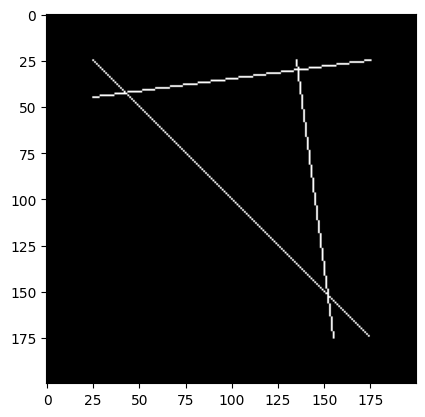

In [6]:
# Generating figure 1 - input image
plt.imshow(image, cmap=cm.gray)
print('input image')

In [7]:
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]


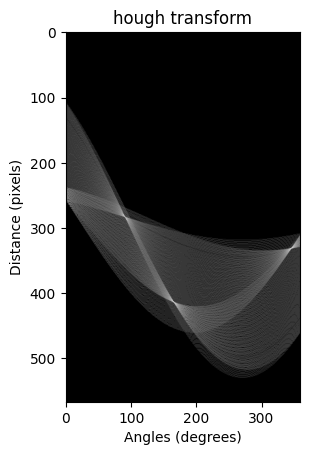

In [8]:
fig, ax = plt.subplots()
ax.set_title('hough transform')
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')
ax.imshow(np.log(1 + h), cmap=cm.gray)


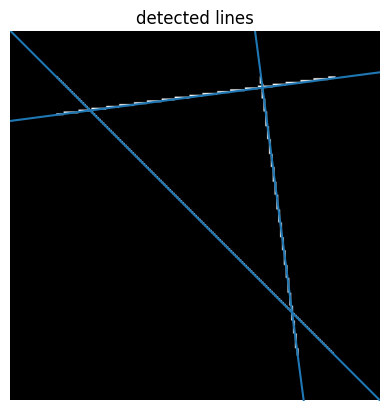

In [9]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=cm.gray)
ax.set_ylim(image.shape[0], 0)
ax.set_axis_off()
ax.set_title('detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2))

In [20]:
def apply_hough(image, theta=None):
    if theta is not None:
        tested_angles = theta
    else:
        tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
    
    h, theta, d = hough_line(image, theta=tested_angles)
    angle_step = 0.5 * np.diff(theta).mean()
    d_step = 0.5 * np.diff(d).mean()
    bounds = [np.rad2deg(theta[0] - angle_step),
              np.rad2deg(theta[-1] + angle_step),
              d[-1] + d_step, d[0] - d_step]

    ht = np.log(1 + h)
    plot_lines = np.zeros((200, 200))
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
        x0 = int(x0)
        y0 = int(y0)
        plot_lines[x0][y0] = 255
    
    return ht, plot_lines

In [21]:
# constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[draw_line(45,25,25,175)] = 255
image[draw_line(25,135,175,155)] = 255
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)


In [25]:
ht, lines = apply_hough(image, tested_angles)

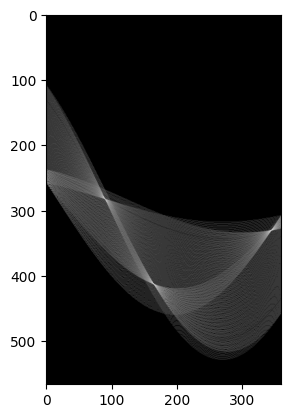

In [26]:
plt.imshow(ht, cmap=cm.gray)

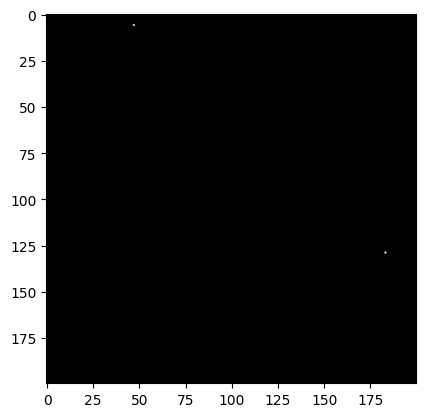

In [28]:
plt.imshow(lines, cmap=cm.gray)

Don't know how to extract the plotted results into numpy arrays. We should explore [opencv hough transform](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html), given that they use the polar space coordinates that Claudio mentioned.